# Heart Disease
**Objective**: To visualize the Heart Disease data Cleveland UCI from kaggle website, and to compare Random Forest and XGBoost prediction models.

The data includes 303 patient level features including if they have heart disease at the end or not. 

Features collected include:
- **Age**
- **Sex**: (0: Female 1: Male) 
- **Chest Pain Type**: (0: Typical Angina 1: Atypical Angina 2: Non-Anginal Pain 3: Asymptomatic) 
- **Resting Blood Pressure**: Person's resting blood pressure. 
- **Cholesterol**: Serum Cholesterol in mg/dl 
- **Fasting Blood Sugar**: (0:Less Than 120mg/ml 1: Greater Than 120mg/ml) 
- **Resting Electrocardiographic Measurement**: (0: Normal 1: ST-T Wave Abnormality 2: Left Ventricular Hypertrophy) 
- **Max Heart Rate Achieved: Maximum Heart Rate Achieved 
- **Exercise Induced Angina**: (1: Yes 0: No) 
- **oldpeak**: ST depression induced by exercise relative to rest. 
- **Slope**: Slope of the peak exercise ST segment (0: Upsloping 1: Flat 2: Downsloping) 
- **Number of major vessels (0-3) colored by fluoroscopy**
- **Thalassemia**: A blood disorder called 'Thalassemia' (0: Normal 1: Fixed Defect 2: Reversable Defect Number of Major Vessels)



In [1]:
# import libraries
import pandas as pd
import numpy as np
from numpy import interp
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.gridspec as gridspec
import plotly
import plotly.express as go
from sklearn.model_selection import train_test_split

import warnings 
warnings.filterwarnings('ignore')
 
print('complete setup')

complete setup


In [2]:
# data visualisation
# assess data
hdf= pd.read_csv(r'C:\Users\think\Documents\Project\HeartDisease\heart_cleveland_upload.csv')


# read data
hdf.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [3]:
hdf.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0
296,35,1,3,126,282,0,2,156,1,0.0,0,0,2,1


In [4]:
# check out data summary
hdf.info()
# it shows that there is no null values across the dataset and all data type is either integer or float.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [5]:
#rename the column names for better readibility
column_names= ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate', 'exercise_induced_angina', 'ST_depression', 'ST_slope', 'num_major_vessels', 'thalassemia', 'heart_attack']
hdf.columns= column_names

In [6]:
#change the following to categorical variables for EDA interpretation
hdf['sex'] = hdf['sex'].map({0:'female',1:'male'})

#chest pain type 
hdf['chest_pain_type'] = hdf['chest_pain_type'].map({0: 'typical angina', 1:'atypical angina', 2:'non-anginal pain', 3:'asymptomatic'})

#fasting blood sugar 
hdf['fasting_blood_sugar'] = hdf['fasting_blood_sugar'].map({0: '<120mg/dl', 1:'>120mg/dl'})

#resting electrocardiographic results 
hdf['rest_ecg']= hdf['rest_ecg'].map({0:'normal', 1:'ST-T wave abnormality', 2:'probable/definite left ventricular hypertrophy'})

#exercise induced angina 
hdf['exercise_induced_angina']= hdf['exercise_induced_angina'].map({0:'no',1:'yes'})

#ST_slope
hdf['ST_slope']= hdf['ST_slope'].map({0: 'unsloping', 1:'flat', 2:'downsloping'})

#thalassemia  
hdf['thalassemia']= hdf['thalassemia'].map({0: 'normal', 1:'fixed defect', 2:'reversable defect'})

#heart attack
hdf['heart_attack']= hdf['heart_attack'].map({0:'no', 1:'yes'})

# Data Visualization
**I) Categorical data**

a) observe the univariate categorical distributions

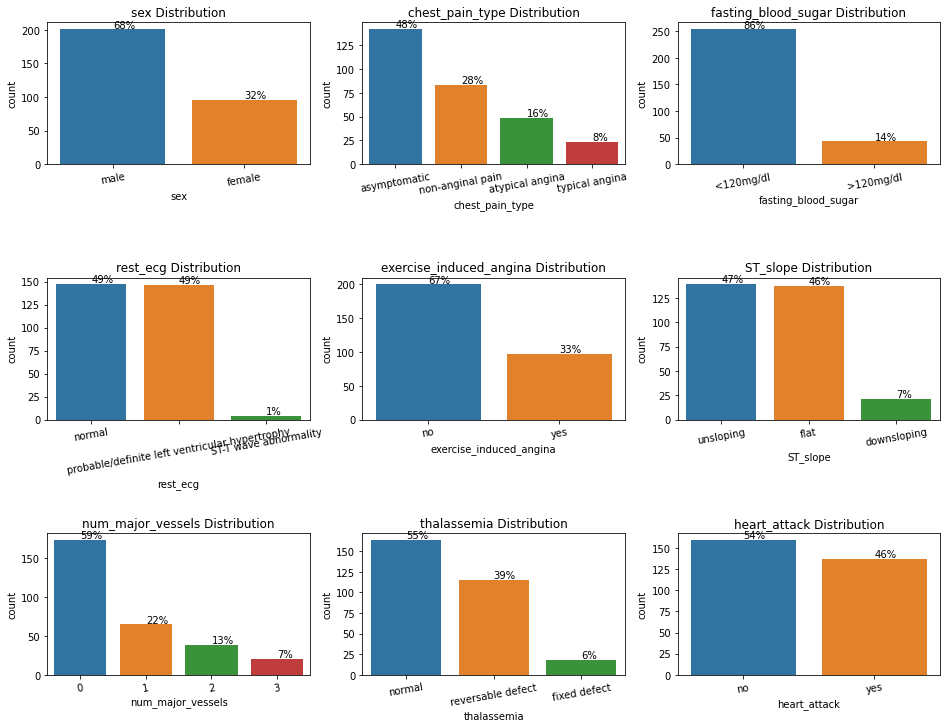

In [7]:
ctg_columns= ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg', 'exercise_induced_angina', 'ST_slope', 'num_major_vessels', 'thalassemia', 'heart_attack']
def categorical_dist(data, cols, hue, nrows, ncols):
    figure, axes= plt.subplots(nrows, ncols, figsize= (16,12))
    axes= axes.flatten()
    for i,j in zip(data[cols].columns,axes):
        sns.countplot(x= i, data= hdf, hue=hue, order= hdf[i].value_counts().index, ax=j)
        j.set_title('{} Distribution'.format(str(i)))
        j.tick_params(axis= 'x', labelrotation=10)
        plt.subplots_adjust(hspace = 0.8)
        
        total= len(data[i])
        for p in j.patches:
            height= p.get_height()
            j.text(p.get_x() + p.get_width()/2., height+2,
                   "{}%".format(round((height/total)*100),ha='center'))
            plt.tight_layout
       
    
categorical_dist(hdf, ctg_columns, hue=None, nrows=3, ncols=3)

Intepretation:

~70% of the data is from male
~50% of the data do not show chest pain symptom.
Majority (86%) of the patients has <120mg/dl fasting blood sugar level.
For resting_ecg, the data is equally distributed among 'normal' and 'probable/definine left ventricular hypertrophy
~70% of patients do not have exercise-induced angina.
more than 80% of patients is equally distributed among 'unsloping' and 'flat' ST slope distribution.
55% of patients do not have thalassemia while 39% of them had reversible defect.

**b) Categorical data distribution vs. condition**

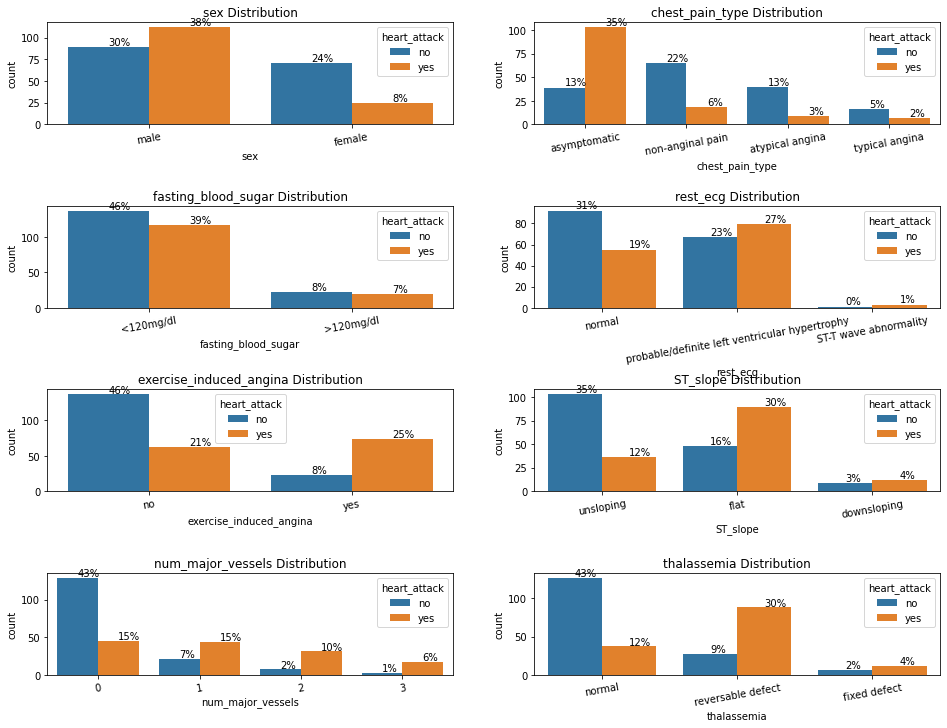

In [8]:
# categorical data distribution vs. the condition.
categorical_dist(hdf, ctg_columns, hue= hdf['heart_attack'], nrows= 4, ncols=2)

Intepretation:

Males are more likely to have heart disease as compared to female.
Chest_pain type has no direct relation of having heart disease, asymptomatic chest pain contributed to 35% of the heart attack cases.
Fasting blood sugar has no direct relation on the disease.
Rest ECG shows no direct effect as well as having normal rest ecg contributed to 19% of the disease. However, in the normal rest ECG group, it also shows that 31% of the patients did not have heart attack.
Exercise induced angina has quite an effect on having the disease.
30% of patients with flat slope distribution shows more likely in having heart attack.
Having 0 number of major vessels are more likely to not having the disease.
Having thalassemia is also quite a strong indicator of having the disease.
In conclusion, it seems that sex, exercise induced angina, ST_slope, thalassemia shows some relation in the likelihood of having an heart attack.

**II) Numerical data**

a) observe the univariate numerical data distributions

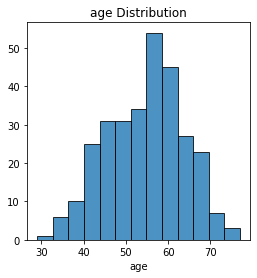

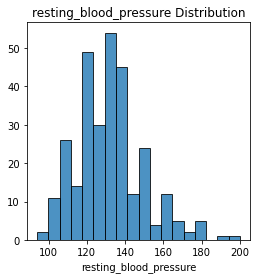

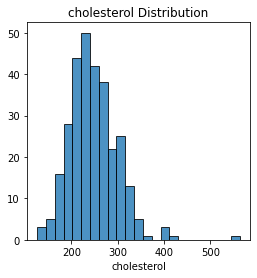

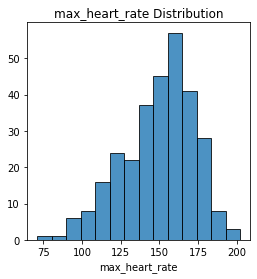

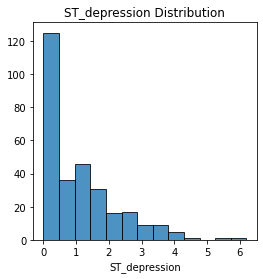

In [9]:
num_columns= ['age', 'resting_blood_pressure', 'cholesterol', 'max_heart_rate', 'ST_depression']
def num_dist(data, cols):
    for i in cols:
        plt.figure(figsize=(4,4))
        sns.distplot(a= data[i], kde= False, hist_kws= {'edgecolor':'black', 'alpha':0.8})
        plt.title('{} Distribution'.format(str(i)))
        plt.subplots_adjust(hspace = 0.8)
        plt.show()
     
num_dist(hdf, num_columns)

Most of the continuous variables show a Gaussian distribution while the ST_depression plot is right-skewed. There are some outliers in the cholesterol data.

b) Numerical data distribution vs. condition

<function matplotlib.pyplot.show(close=None, block=None)>

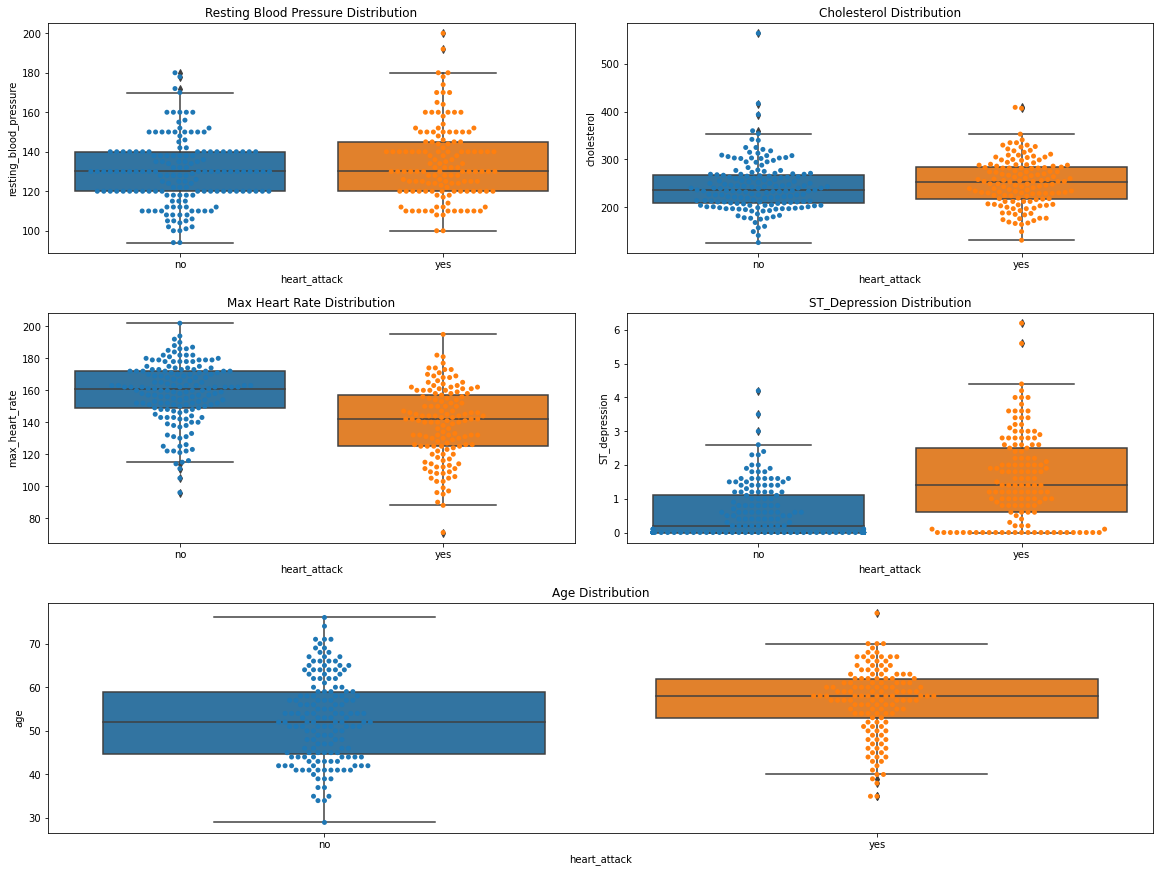

In [10]:
fig= plt.figure(constrained_layout=True, figsize=(16,12))
grid= gridspec.GridSpec(ncols=4, nrows=3, figure= fig)

#resting_blood_pressure
ax1= fig.add_subplot(grid[0, :2])
ax1.set_title('Resting Blood Pressure Distribution')
sns.boxplot(x= 'heart_attack', y= 'resting_blood_pressure', data= hdf, ax= ax1)
sns.swarmplot(x= 'heart_attack', y= 'resting_blood_pressure', data=hdf, ax= ax1)

#resting_ecg
ax2= fig.add_subplot(grid[0, 2:])
ax2.set_title("Cholesterol Distribution")
sns.boxplot(x= 'heart_attack', y='cholesterol', data=hdf, ax= ax2)
sns.swarmplot(x= 'heart_attack', y= 'cholesterol', data=hdf, ax= ax2)

#exercise_induced angina
ax3= fig.add_subplot(grid[1, :2])
ax3.set_title('Max Heart Rate Distribution')
sns.boxplot(x= 'heart_attack', y= 'max_heart_rate', data= hdf, ax=ax3)
sns.swarmplot(x= 'heart_attack', y= 'max_heart_rate', data= hdf, ax=ax3)

#ST depression 
ax4= fig.add_subplot(grid[1, 2:])
ax4.set_title('ST_Depression Distribution')
sns.boxplot(x= 'heart_attack', y= 'ST_depression', data= hdf, ax=ax4)
sns.swarmplot(x= 'heart_attack', y= 'ST_depression', data= hdf, ax=ax4)

#age 
ax5= fig.add_subplot(grid[2, :])
ax5.set_title('Age Distribution')
sns.boxplot(x= 'heart_attack', y= 'age', data=hdf, ax=ax5)
sns.swarmplot(x= 'heart_attack', y= 'age', data=hdf, ax=ax5)
plt.show

Intepretation

Although both having higher resting blood pressure and cholesterol have subtle effect on having the disease but the effect is not too significant.
It shows that having higher max heart rate is prone to not having the disease.
Having higher ST_depression levels has some significant impact on having the disease.
Older patients seems more likely to have heart attack.
In conclusion, it seems that age, ST_depression, resting blood pressure and cholesterol may have contributed on having the disease.

## Modelling

In [12]:
o_hdf= pd.read_csv(r'C:\Users\think\Documents\Project\HeartDisease\heart_cleveland_upload.csv')
# separate target from predictors
X= hdf.drop('heart_attack', axis=1)
y= o_hdf['condition']

In [13]:
# set the categorical variables(sex, exercise induced angina, ST_slope, thalassemia) to dummy variables
categorical_df= pd.get_dummies(data= hdf[['sex', 'exercise_induced_angina', 'ST_slope', 'thalassemia']])
X.drop(['sex', 'chest_pain_type', 'fasting_blood_sugar', 'max_heart_rate', 'rest_ecg', 'exercise_induced_angina', 'ST_slope', 'num_major_vessels', 'thalassemia'], axis=1, inplace=True)
X= pd.concat([X, categorical_df], axis=1)
X

,age,resting_blood_pressure,cholesterol,ST_depression,sex_female,sex_male,exercise_induced_angina_no,exercise_induced_angina_yes,ST_slope_downsloping,ST_slope_flat,ST_slope_unsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect
0,69,160,234,0.1,0,1,1,0,0,1,0,0,1,0
1,69,140,239,1.8,1,0,1,0,0,0,1,0,1,0
2,66,150,226,2.6,1,0,1,0,1,0,0,0,1,0
3,65,138,282,1.4,0,1,1,0,0,1,0,0,1,0
4,64,110,211,1.8,0,1,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,152,223,0.0,0,1,1,0,0,0,1,0,0,1
293,39,118,219,1.2,0,1,1,0,0,1,0,0,0,1
294,35,120,198,1.6,0,1,0,1,0,1,0,0,0,1
295,35,138,183,1.4,1,0,1,0,0,0,1,0,1,0


In [14]:
# divide data into training and validation subsets
X_train_full, X_valid_full, y_train, y_valid= train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

# keep selected columns only
X_train= X_train_full.copy()
X_valid= X_valid_full.copy()

In [15]:
X_train.head()

,age,resting_blood_pressure,cholesterol,ST_depression,sex_female,sex_male,exercise_induced_angina_no,exercise_induced_angina_yes,ST_slope_downsloping,ST_slope_flat,ST_slope_unsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect
282,43,120,177,2.5,0,1,0,1,0,1,0,0,0,1
81,67,152,277,0.0,1,0,1,0,0,0,1,0,1,0
108,54,120,258,0.4,0,1,1,0,0,1,0,0,0,1
146,42,130,180,0.0,0,1,1,0,0,0,1,0,1,0
217,58,146,218,2.0,0,1,1,0,0,1,0,0,0,1


In [16]:
# install sklearn packages
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor

**Random Forest Regressor**

In [17]:
# Define Model
RF_modeldict= {"RF_model0": RandomForestRegressor(random_state=0), 
               "RF_model1": RandomForestRegressor(n_estimators=200, random_state= 0 ), 
               "RF_model2": RandomForestRegressor(n_estimators=200, max_depth=8, random_state=0)}

# Run a for loop to find out the mean absolute score for each model
for k,model in RF_modeldict.items():
    model.fit(X_train, y_train)
    pred= model.predict(X_valid)
    score= mean_absolute_error(y_valid, pred)
    score_lst=[]
    score_lst.append("{} : {}".format(k, score))
    print(score_lst)


['RF_model0 : 0.32933333333333337']
['RF_model1 : 0.3268333333333333']
['RF_model2 : 0.32849177526907997']


RF_model 1(RandomForestRegressor(n_estimators=200, random_state= 0 )) has the smallest mean absolute error.

**XGBoost Regressor**

In [18]:
# define model
XGB_modeldict= {"XGB_model0": XGBRegressor(n_estimators=1000, random_state=0), 
                "XGB_model1": XGBRegressor(n_estimators=1000, learning_rate=0.05, random_state=0),
                "XGB_model2": XGBRegressor(n_estimators=5000, learning_rate=0.05, random_state=0), 
                "XGB_model3": XGBRegressor(n_estimators=1000, learning_rate= 0.1, random_state=0)}

for key,model in XGB_modeldict.items():
    model.fit(X_train, y_train)
    pred= model.predict(X_valid)
    score= mean_absolute_error(y_valid, pred)
    score_lst=[]
    score_lst.append("{}: {}".format(key, score))
    print(score_lst)


['XGB_model0: 0.31011350732684756']
['XGB_model1: 0.2938923347120484']
['XGB_model2: 0.2938923347120484']
['XGB_model3: 0.2990972296567634']


XGB_model1 (XGBRegressor(n_estimators=1000, learning_rate=0.05, random_state=0) and XGB_model2 (XGBRegressor(n_estimators=3000, learning_rate=0.05, random_state=0) has the smallest mean absolute error. 

### Conclusion:

Comparing the two types of regression model, XGBoost Regressor yields better results.